<a href="https://colab.research.google.com/github/SushiFou/ML-Business-Case-Project/blob/main/Statistical_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <div align="center"><b> Machine Learning Business Case Project </b></div>
---
<div align="center">Authors : Maxime Lepeytre | Soumaya Sabry | Alexandre Zajac | Olivier Boivin | Yann Kervella


<center>
<img src="https://github.com/SushiFou/ML-Business-Case-Project/blob/main/cover_image_tech.jpg?raw=1" width="800px"/>
</center>
</div>

<div align="center"><font color='red' size='12'> DON'T FORGET TO COMMIT CHANGES ON GITHUB FOLKS ! Good luck ! <font></div>

## Context

Vous êtes consultant data scientist dans une grande entreprise de conseil
française. Votre client est une entreprise qui génère beaucoup de données
mais pour le moment aucun modèle de Machine Learning n'a été mis en
place pour les exploiter. Elle a donc naturellement fait appel à vous.

L’entreprise en question exploite plus de 3 000 magasins dans 7 pays
européens. Actuellement, les directeurs de magasin sont chargés d’estimer
leurs ventes quotidiennes jusqu'à six semaines à l'avance. Les ventes des
magasins sont influencées par de nombreux facteurs, notamment les
promotions, la concurrence, les vacances scolaires, la saisonnalité et la
localité. Avec des milliers de gestionnaires individuels prédisant les ventes
en fonction de leur situation particulière, la précision des résultats peut
être très variable.

Avec votre équipe de consultant data scientists, vous récupérez les
données disponibles et allez mener un projet complet pour les exploiter et
répondre à la problématique. Vous devez préparer et soutenir, pour le 21
janvier 2021, un rendu sous forme de slides qui tirera les conclusions de
votre travail, incluant une démonstration présentant les résultats du
modèle de Machine Learning de manière visuelle à destination des
utilisateur finaux. Vous aurez 12 minutes pour présenter votre travail à
votre donneur d’ordre client.

## Requirements


In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from pandas.plotting import lag_plot

In [12]:
# Graphical settings
CB91_Blue = '#2CBDFE'
CB91_Green = '#47DBCD'
CB91_Pink = '#F3A0F2'
CB91_Purple = '#9D2EC5'
CB91_Violet = '#661D98'
CB91_Amber = '#F5B14C'
color_list = [CB91_Blue, CB91_Pink, CB91_Green, CB91_Amber,
              CB91_Purple, CB91_Violet]
params = {"ytick.color" : "w",
          "xtick.color" : "w",
          'axes.labelsize' : 15,
          "axes.labelcolor" : "w",
          "axes.edgecolor" : "w",
          "axes.titlecolor": "w", 
          'figure.figsize': [20, 8], 
          'axes.prop_cycle': plt.cycler(color=color_list), 
          'figure.dpi' : 75, 
          'legend.fontsize': 10,
          'font.size': 15 
          }
plt.rcParams.update(params)

## Data Importation

### gdown if using colab

In [13]:
!gdown "https://drive.google.com/uc?id=1IHr_vKHZ0P0lUIAksJ9joRLUoUtZdDSY"

Downloading...
From: https://drive.google.com/uc?id=1IHr_vKHZ0P0lUIAksJ9joRLUoUtZdDSY
To: /content/store.csv
100% 45.0k/45.0k [00:00<00:00, 16.5MB/s]


In [14]:
!gdown "https://drive.google.com/uc?id=17ur-ILBNAZDgjpqgPU1XBLYSIXc5cn5d"

Downloading...
From: https://drive.google.com/uc?id=17ur-ILBNAZDgjpqgPU1XBLYSIXc5cn5d
To: /content/test.csv
100% 1.43M/1.43M [00:00<00:00, 87.1MB/s]


In [15]:
!gdown "https://drive.google.com/uc?id=1kx5sSTcRj4aVS8KZgSCcdo9-5i1axh5n"

Downloading...
From: https://drive.google.com/uc?id=1kx5sSTcRj4aVS8KZgSCcdo9-5i1axh5n
To: /content/train.csv
38.1MB [00:00, 232MB/s]


In [16]:
!gdown "https://drive.google.com/uc?id=10p7JyO2DNkWbMRZoMNVPmipy1msZpBEV"

Downloading...
From: https://drive.google.com/uc?id=10p7JyO2DNkWbMRZoMNVPmipy1msZpBEV
To: /content/variables.txt
100% 1.58k/1.58k [00:00<00:00, 2.56MB/s]


## Data Exploration

In [17]:
f = open("variables.txt", "r")
print(f.read())

Most of the fields are self-explanatory. The following are descriptions for those that aren't.

Id - an Id that represents a (Store, Date) duple within the test set
Store - a unique Id for each store
Sales - the turnover for any given day
Customers - the number of customers on a given day
Open - an indicator for whether the store was open: 0 = closed, 1 = open
StateHoliday - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None
SchoolHoliday - indicates if the (Store, Date) was affected by the closure of public schools
StoreType - differentiates between 4 different store models: a, b, c, d
Assortment - describes an assortment level: a = basic, b = extra, c = extended
CompetitionDistance - distance in meters to the nearest competitor store
CompetitionOpenSince[Month/Year] - gives the approximate year and month of t

In [18]:
store_data = pd.read_csv('store.csv')
print(f'Dataframe shape : rows = {store_data.shape[0]}, columns = {store_data.shape[1]}')
store_data.tail()
store_data.info()

Dataframe shape : rows = 1115, columns = 10


,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN
1114,1115,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [19]:
train_data = pd.read_csv('train.csv', low_memory = False)
print(f'Dataframe shape : rows = {train_data.shape[0]}, columns = {train_data.shape[1]}')
train_data.tail()
train_data.info()

Dataframe shape : rows = 1017209, columns = 9


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1
1017208,1115,2,2013-01-01,0,0,0,0,a,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


### Check Nan Values

In [20]:
store_data.isna().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

Only 3 Nan values in competition distance 

A lot of nan due to no competition registered for some tuples

In [21]:
train_data.isna().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

In [22]:
store_data['CompetitionDistance'].fillna(store_data['CompetitionDistance'].mean(), inplace = True)

In [23]:
store_data.fillna(-1, inplace=True)

In [24]:
store_data.isna().sum()

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

### Check Outliers

In [25]:
store_data.describe()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115.00000,1115.000000,1115.000000,1115.000000,1115.000000,1115.000000,1115.00000
mean,558.00000,5404.901079,4.613453,1370.621525,0.512108,11.595516,1029.75157
std,322.01708,7652.849306,4.659540,935.933356,0.500078,15.925223,1006.53886
min,1.00000,20.000000,-1.000000,-1.000000,0.000000,-1.000000,-1.00000
25%,279.50000,720.000000,-1.000000,-1.000000,0.000000,-1.000000,-1.00000
50%,558.00000,2330.000000,4.000000,2006.000000,1.000000,1.000000,2009.00000
75%,836.50000,6875.000000,9.000000,2011.000000,1.000000,22.000000,2012.00000
max,1115.00000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.00000


Let's try to process the CompetitionDistance Outliers

In [26]:
from scipy import stats
store_data['CD_zscore'] = np.abs(stats.zscore(store_data['CompetitionDistance'].to_numpy()))
store_data.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,CD_zscore
0,1,c,a,1270.0,9.0,2008.0,0,-1.0,-1.0,-1,0.540551
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",0.632061
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",1.140623
3,4,c,c,620.0,9.0,2009.0,0,-1.0,-1.0,-1,0.625525
4,5,a,a,29910.0,4.0,2015.0,0,-1.0,-1.0,-1,3.203525


In [27]:
store_data_cleaned = store_data[store_data['CD_zscore'] < 3]
store_data_cleaned.describe()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,CD_zscore
count,1093.000000,1093.000000,1093.000000,1093.000000,1093.000000,1093.000000,1093.000000,1093.000000
mean,559.150046,4725.402290,4.617566,1363.264410,0.522415,11.849039,1050.498628,0.608184
std,322.261812,5825.426321,4.683200,938.761871,0.499726,15.983167,1005.830924,0.466511
min,1.000000,20.000000,-1.000000,-1.000000,0.000000,-1.000000,-1.000000,0.000000
25%,279.000000,700.000000,-1.000000,-1.000000,0.000000,-1.000000,-1.000000,0.349713
50%,560.000000,2280.000000,4.000000,2006.000000,1.000000,1.000000,2009.000000,0.553650
75%,839.000000,6360.000000,9.000000,2011.000000,1.000000,22.000000,2012.000000,0.673895
max,1115.000000,27650.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000,2.908078


In [28]:
store_data = store_data_cleaned.drop(columns='CD_zscore')
store_data.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,-1.0,-1.0,-1
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,-1.0,-1.0,-1
5,6,a,a,310.0,12.0,2013.0,0,-1.0,-1.0,-1


In [29]:
train_data.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00




## Label encoding 


In [30]:
from sklearn.preprocessing import OneHotEncoder as SklearnOneHotEncoder

class OneHotEncoder(SklearnOneHotEncoder):
    def __init__(self, **kwargs):
        super(OneHotEncoder, self).__init__(**kwargs)
        self.fit_flag = False

    def fit(self, X, **kwargs):
        out = super().fit(X)
        self.fit_flag = True
        return out

    def transform(self, X, **kwargs):
        sparse_matrix = super(OneHotEncoder, self).transform(X)
        new_columns = self.get_new_columns(X=X)
        d_out = pd.DataFrame(sparse_matrix.toarray(), columns=new_columns, index=X.index)
        return d_out

    def fit_transform(self, X, **kwargs):
        self.fit(X)
        return self.transform(X)

    def get_new_columns(self, X):
        new_columns = []
        for i, column in enumerate(X.columns):
            j = 0
            while j < len(self.categories_[i]):
                new_columns.append(f'{column}_<{self.categories_[i][j]}>')
                j += 1
        return new_columns

In [31]:
encoder = OneHotEncoder()
labels = encoder.fit_transform(store_data[["StoreType","Assortment"]])
store_data_labels = store_data.copy(deep=True)
store_data_labels = pd.concat([store_data_labels, labels], axis=1)
del store_data_labels["Assortment"]
del store_data_labels['CompetitionOpenSinceMonth']
del store_data_labels['CompetitionOpenSinceYear']
del store_data_labels['Promo2SinceWeek']
del store_data_labels['Promo2SinceYear']
del store_data_labels['PromoInterval']
train_data["StateHoliday"].replace('0', 'd',inplace=True)
encoder2 = OneHotEncoder()
labels = encoder2.fit_transform(train_data[["StateHoliday"]])
train_data_labels = train_data.copy(deep=True)
train_data_labels = pd.concat([train_data_labels, labels], axis=1)
del train_data_labels["StateHoliday"]
store_data_labels.tail()
train_data_labels.tail()

,Store,StoreType,CompetitionDistance,Promo2,StoreType_<a>,StoreType_<b>,StoreType_<c>,StoreType_<d>,Assortment_<a>,Assortment_<b>,Assortment_<c>
1110,1111,a,1900.0,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1111,1112,c,1880.0,0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1112,1113,a,9260.0,0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1113,1114,a,870.0,0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1114,1115,d,5350.0,1,0.0,0.0,0.0,1.0,0.0,0.0,1.0


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,SchoolHoliday,StateHoliday_<a>,StateHoliday_<b>,StateHoliday_<c>,StateHoliday_<d>
1017204,1111,2,2013-01-01,0,0,0,0,1,1.0,0.0,0.0,0.0
1017205,1112,2,2013-01-01,0,0,0,0,1,1.0,0.0,0.0,0.0
1017206,1113,2,2013-01-01,0,0,0,0,1,1.0,0.0,0.0,0.0
1017207,1114,2,2013-01-01,0,0,0,0,1,1.0,0.0,0.0,0.0
1017208,1115,2,2013-01-01,0,0,0,0,1,1.0,0.0,0.0,0.0


In [32]:
df = train_data.merge(store_data_labels, how='left', on='Store')
df.Date = pd.to_datetime(df.Date)
df.set_index('Date', inplace = True)
df.tail()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,CompetitionDistance,Promo2,StoreType_<a>,StoreType_<b>,StoreType_<c>,StoreType_<d>,Assortment_<a>,Assortment_<b>,Assortment_<c>
Date,,,,,,,,,,,,,,,,,,
2013-01-01,1111,2,0,0,0,0,a,1,a,1900.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2013-01-01,1112,2,0,0,0,0,a,1,c,1880.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2013-01-01,1113,2,0,0,0,0,a,1,a,9260.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2013-01-01,1114,2,0,0,0,0,a,1,a,870.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2013-01-01,1115,2,0,0,0,0,a,1,d,5350.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [33]:
df_a = df[df['StoreType']=='a'].resample('D').median()
df_b = df[df['StoreType']=='b'].resample('D').median()
df_c = df[df['StoreType']=='c'].resample('D').median()
df_d = df[df['StoreType']=='d'].resample('D').median()
df_type = [df_a,df_b,df_c,df_d]

## By group type


### Seasonality

In [34]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import warnings
warnings.filterwarnings("ignore")

def sesonality(ts,val,title,y_label,nbr=6):
    val = val
    ts = ts
    #new columns
    ts['Month'] = ts.index.month
    ts['Year'] = ts.index.year

    #pivot table
    pivot_table = pd.pivot_table(ts, values=val, index=['Month'], columns=['Year'], aggfunc=np.sum)
    pivot_table['Max'] = pivot_table.iloc[:,-6:-1].quantile(0.25,axis=1)
    pivot_table['Min'] = pivot_table.iloc[:,-7:-2].quantile(0.75,axis=1)
    pivot_table['5 Year Avg'] = pivot_table.iloc[:,-8:-3].mean(axis=1)

    #plot
    plot = go.Figure()
    # Set the colors for the lines
    colors = ['#17becf','#e377c2','#ff7f0e','#2ca02c','darkblue','firebrick']
    # Create x-axis labels for the months
    months = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
    data = pivot_table
    plot.add_trace(go.Scatter(x=months, y=data['Max'],
                              fill=None,
                              mode=None,
                              line_color='lightgray',showlegend=False
                              ))
    plot.add_trace(go.Scatter(x=months, y=data['Min'],
                              fill='tonexty',
                              mode=None,
                              line_color='lightgray', showlegend=False
                              ))
    plot.add_trace(go.Scatter(x=months, y=data['5 Year Avg'], name=str(nbr)+' Year Avg',
                              line=dict(color='black', width=4, dash='dot')))


    for i in range(nbr):
        index = -4-i
        plot.add_trace(go.Scatter(x=months, y=data.iloc[:,index], name=data.columns[index],
                                line=dict(color=colors[i], width=4)))
    plot.update_layout(title=title,
                      xaxis_title='Month',
                      yaxis_title= y_label,
                      template='plotly_white')
    plot.show()
    return pivot_table

In [35]:
_ = sesonality(df_a,'Sales','Seso store type A','Sales',3)
_ = sesonality(df_b,'Sales','Seso store type B','Sales',3)
_ = sesonality(df_c,'Sales','Seso store type C','Sales',3)
_ = sesonality(df_d,'Sales','Seso store type D','Sales',3)

###  Statistiques only by group type

**Using Granger Causality Test the causality between two timesieries**



Granger causality test is used to determine if one time series will be useful to forecast another variable by investigating causality between two variables in a time series. The method is a probabilistic account of causality; it uses observed data sets to find patterns of correlation. One good thing about time series vector autoregression (VAR) is that we could test ‘causality’ in some sense. This test is first proposed by Granger (1969), and therefore we refer to it as the Granger causality.
Simple Mechanism to define Granger Causality:
It is based on the idea that if X causes Y, then the forecast of Y based on previous values of Y AND the previous values of X should best result in the forecast of Y based on previous values of Y alone.

In [80]:
from statsmodels.tsa.stattools import grangercausalitytests
Sales = pd.DataFrame({'A': df_a.Sales,'B':df_b.Sales,'C':df_c.Sales,'D':df_d.Sales})
Sales_diff = pd.DataFrame({'A': df_a.Sales.diff(),'B':df_b.Sales.diff(),'C':df_c.Sales.diff(),'D':df_d.Sales.diff()})
Sales_diff.dropna(inplace=True)
test = 'ssr_chi2test'
def grangers_causation_matrix(data,lag, variables, test='ssr_chi2test', verbose=False):    
    """Check Granger Causality of all possible combinations of the Time series.
    The rows are the response variable, columns are predictors. The values in the table 
    are the P-Values. P-Values lesser than the significance level (0.05), implies 
    the Null Hypothesis that the coefficients of the corresponding past values is 
    zero, that is, the X does not cause Y can be rejected.

    data      : pandas dataframe containing the time series variables
    variables : list containing names of the time series variables.
    """
    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df.columns:
        for r in df.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=lag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(lag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df.loc[r, c] = min_p_value
    df.columns = [var + '_x' for var in variables]
    df.index = [var + '_y' for var in variables]
    return df
print("*************************************************************")
print("Grangers causation matrix on Sales by group type with lag=7")
grangers_causation_matrix(Sales, 7,variables = Sales.columns)
print("*************************************************************")
print("Grangers causation matrix on Sales.diff() by group type with lag=7")
grangers_causation_matrix(Sales_diff, 7,variables = Sales.columns)

*************************************************************
Grangers causation matrix on Sales by group type


,A_x,B_x,C_x,D_x
A_y,1.0,0.0,0.0,0.0
B_y,0.0,1.0,0.0,0.0
C_y,0.0,0.0,1.0,0.0
D_y,0.0,0.0,0.0,1.0


*************************************************************
Grangers causation matrix on Sales.diff() by group type


,A_x,B_x,C_x,D_x
A_y,1.0,0.0,0.0,0.0
B_y,0.0,1.0,0.0,0.0
C_y,0.0,0.0,1.0,0.0
D_y,0.0,0.0,0.0,1.0


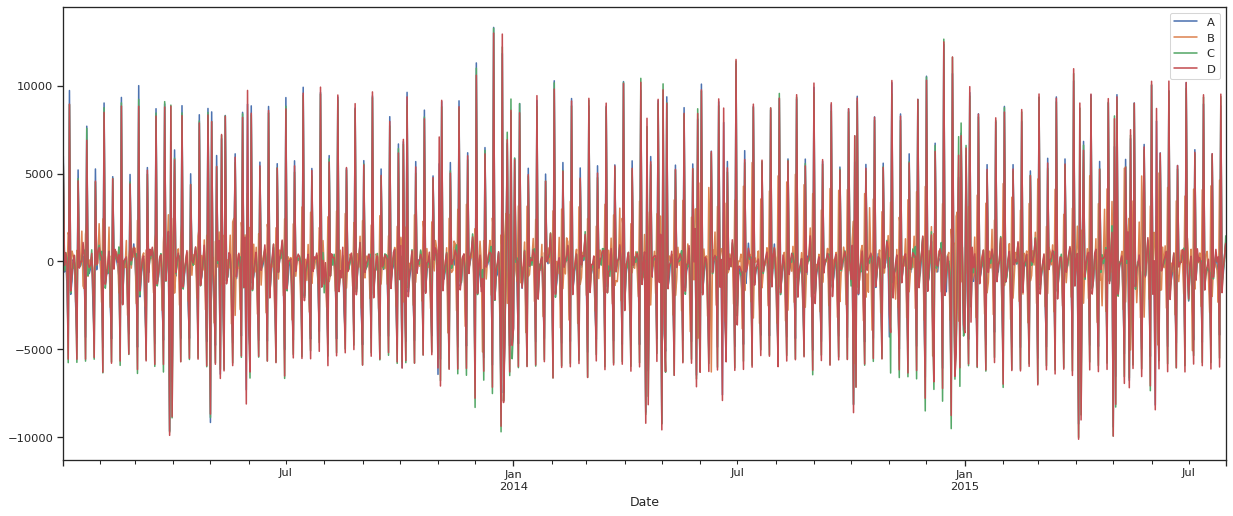

In [50]:
Sales_diff.plot()

In [62]:
from statsmodels.tsa.stattools import kpss
def kpss_test(df, **kw):
    for name in df.columns: 
      series = df[name]
      print("Group type: "+str(name))
      statistic, p_value, n_lags, critical_values = kpss(series, **kw)
      # Format Output
      print(f'KPSS Statistic: {statistic}')
      print(f'p-value: {p_value}')
      print(f'num lags: {n_lags}')
      print('Critial Values:')
      for key, value in critical_values.items():
          print(f'   {key} : {value}')
      print(f'Result: The series is {"not " if p_value < 0.05 else ""}stationary')
kpss_test(Sales_diff)

Group type: A
KPSS Statistic: 0.017681651519378463
p-value: 0.1
num lags: 22
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Result: The series is stationary
Group type: B
KPSS Statistic: 0.029701260043131585
p-value: 0.1
num lags: 22
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Result: The series is stationary
Group type: C
KPSS Statistic: 0.018654798374089517
p-value: 0.1
num lags: 22
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Result: The series is stationary
Group type: D
KPSS Statistic: 0.01841076067162486
p-value: 0.1
num lags: 22
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Result: The series is stationary


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:1711: InterpolationWarning:

p-value is greater than the indicated p-value

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:1711: InterpolationWarning:

p-value is greater than the indicated p-value

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:1711: InterpolationWarning:

p-value is greater than the indicated p-value

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:1711: InterpolationWarning:

p-value is greater than the indicated p-value



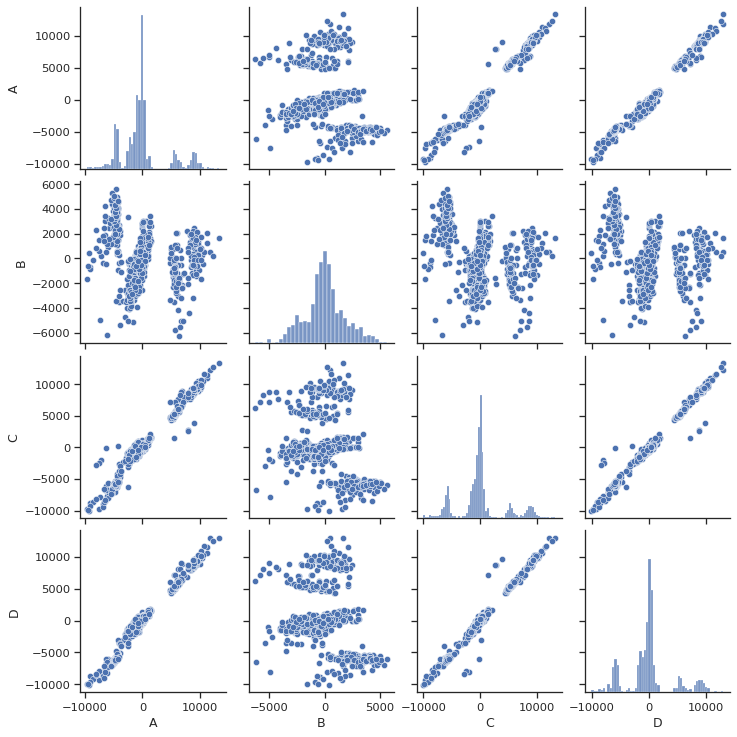

In [39]:
import seaborn as sns
sns.set_theme(style="ticks")
sns.pairplot(Sales_diff)

### Statistique by group type on the full dataframe

In [85]:
print("*************************************************************")
print("Grangers causation matrix on all columns for group type=A with lag=7")
grangers_causation_matrix(df_a, 7,variables = ['Store','DayOfWeek', 'Sales', 'Customers', 'Open', 'Promo',
       'SchoolHoliday', 'CompetitionDistance', 'Month', 'Year'])


*************************************************************
Grangers causation matrix on all columns for group type=A with lag=7


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:1752: ValueWarning:

covariance of constraints does not have full rank. The number of constraints is 5, but rank is 1

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:1752: ValueWarning:

covariance of constraints does not have full rank. The number of constraints is 2, but rank is 1

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:1752: ValueWarning:

covariance of constraints does not have full rank. The number of constraints is 4, but rank is 1

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:1752: ValueWarning:

covariance of constraints does not have full rank. The number of constraints is 2, but rank is 1

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:1752: ValueWarning:

covariance of constraints does not have full rank. The number of constraints is 3, but rank is 2

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:1752: ValueWarn

,Store_x,DayOfWeek_x,Sales_x,Customers_x,Open_x,Promo_x,SchoolHoliday_x,CompetitionDistance_x,Month_x,Year_x
Store_y,1.0000,0.1024,0.0247,0.0098,0.003,0.1376,0.0306,0.0000,0.7859,0.7707
DayOfWeek_y,0.4800,0.0000,0.0000,0.0000,0.000,0.0000,0.0000,0.3042,0.3781,0.4728
Sales_y,0.0519,0.0000,1.0000,0.0000,0.000,0.0000,0.0000,0.0818,0.0080,0.2390
Customers_y,0.0019,0.0000,0.0000,1.0000,0.000,0.0000,0.0000,0.0019,0.0000,0.0597
Open_y,0.1252,0.0000,0.0000,0.0000,1.000,0.0000,0.0000,0.1430,0.0016,0.0024
Promo_y,0.0554,0.0000,0.0000,0.0000,0.000,1.0000,0.0000,0.0543,0.0441,0.1918
SchoolHoliday_y,0.0126,0.0000,0.0000,0.0000,0.000,0.0001,1.0000,0.0217,0.0000,0.0000
CompetitionDistance_y,0.9771,0.1026,0.0247,0.0098,0.003,0.1342,0.0307,1.0000,0.6907,0.8498
Month_y,0.7277,0.1410,0.0009,0.0000,0.000,0.2853,0.0003,0.7369,1.0000,0.8935
Year_y,0.2459,0.1685,0.0010,0.0000,0.000,0.2716,0.0000,0.2461,0.0130,1.0000


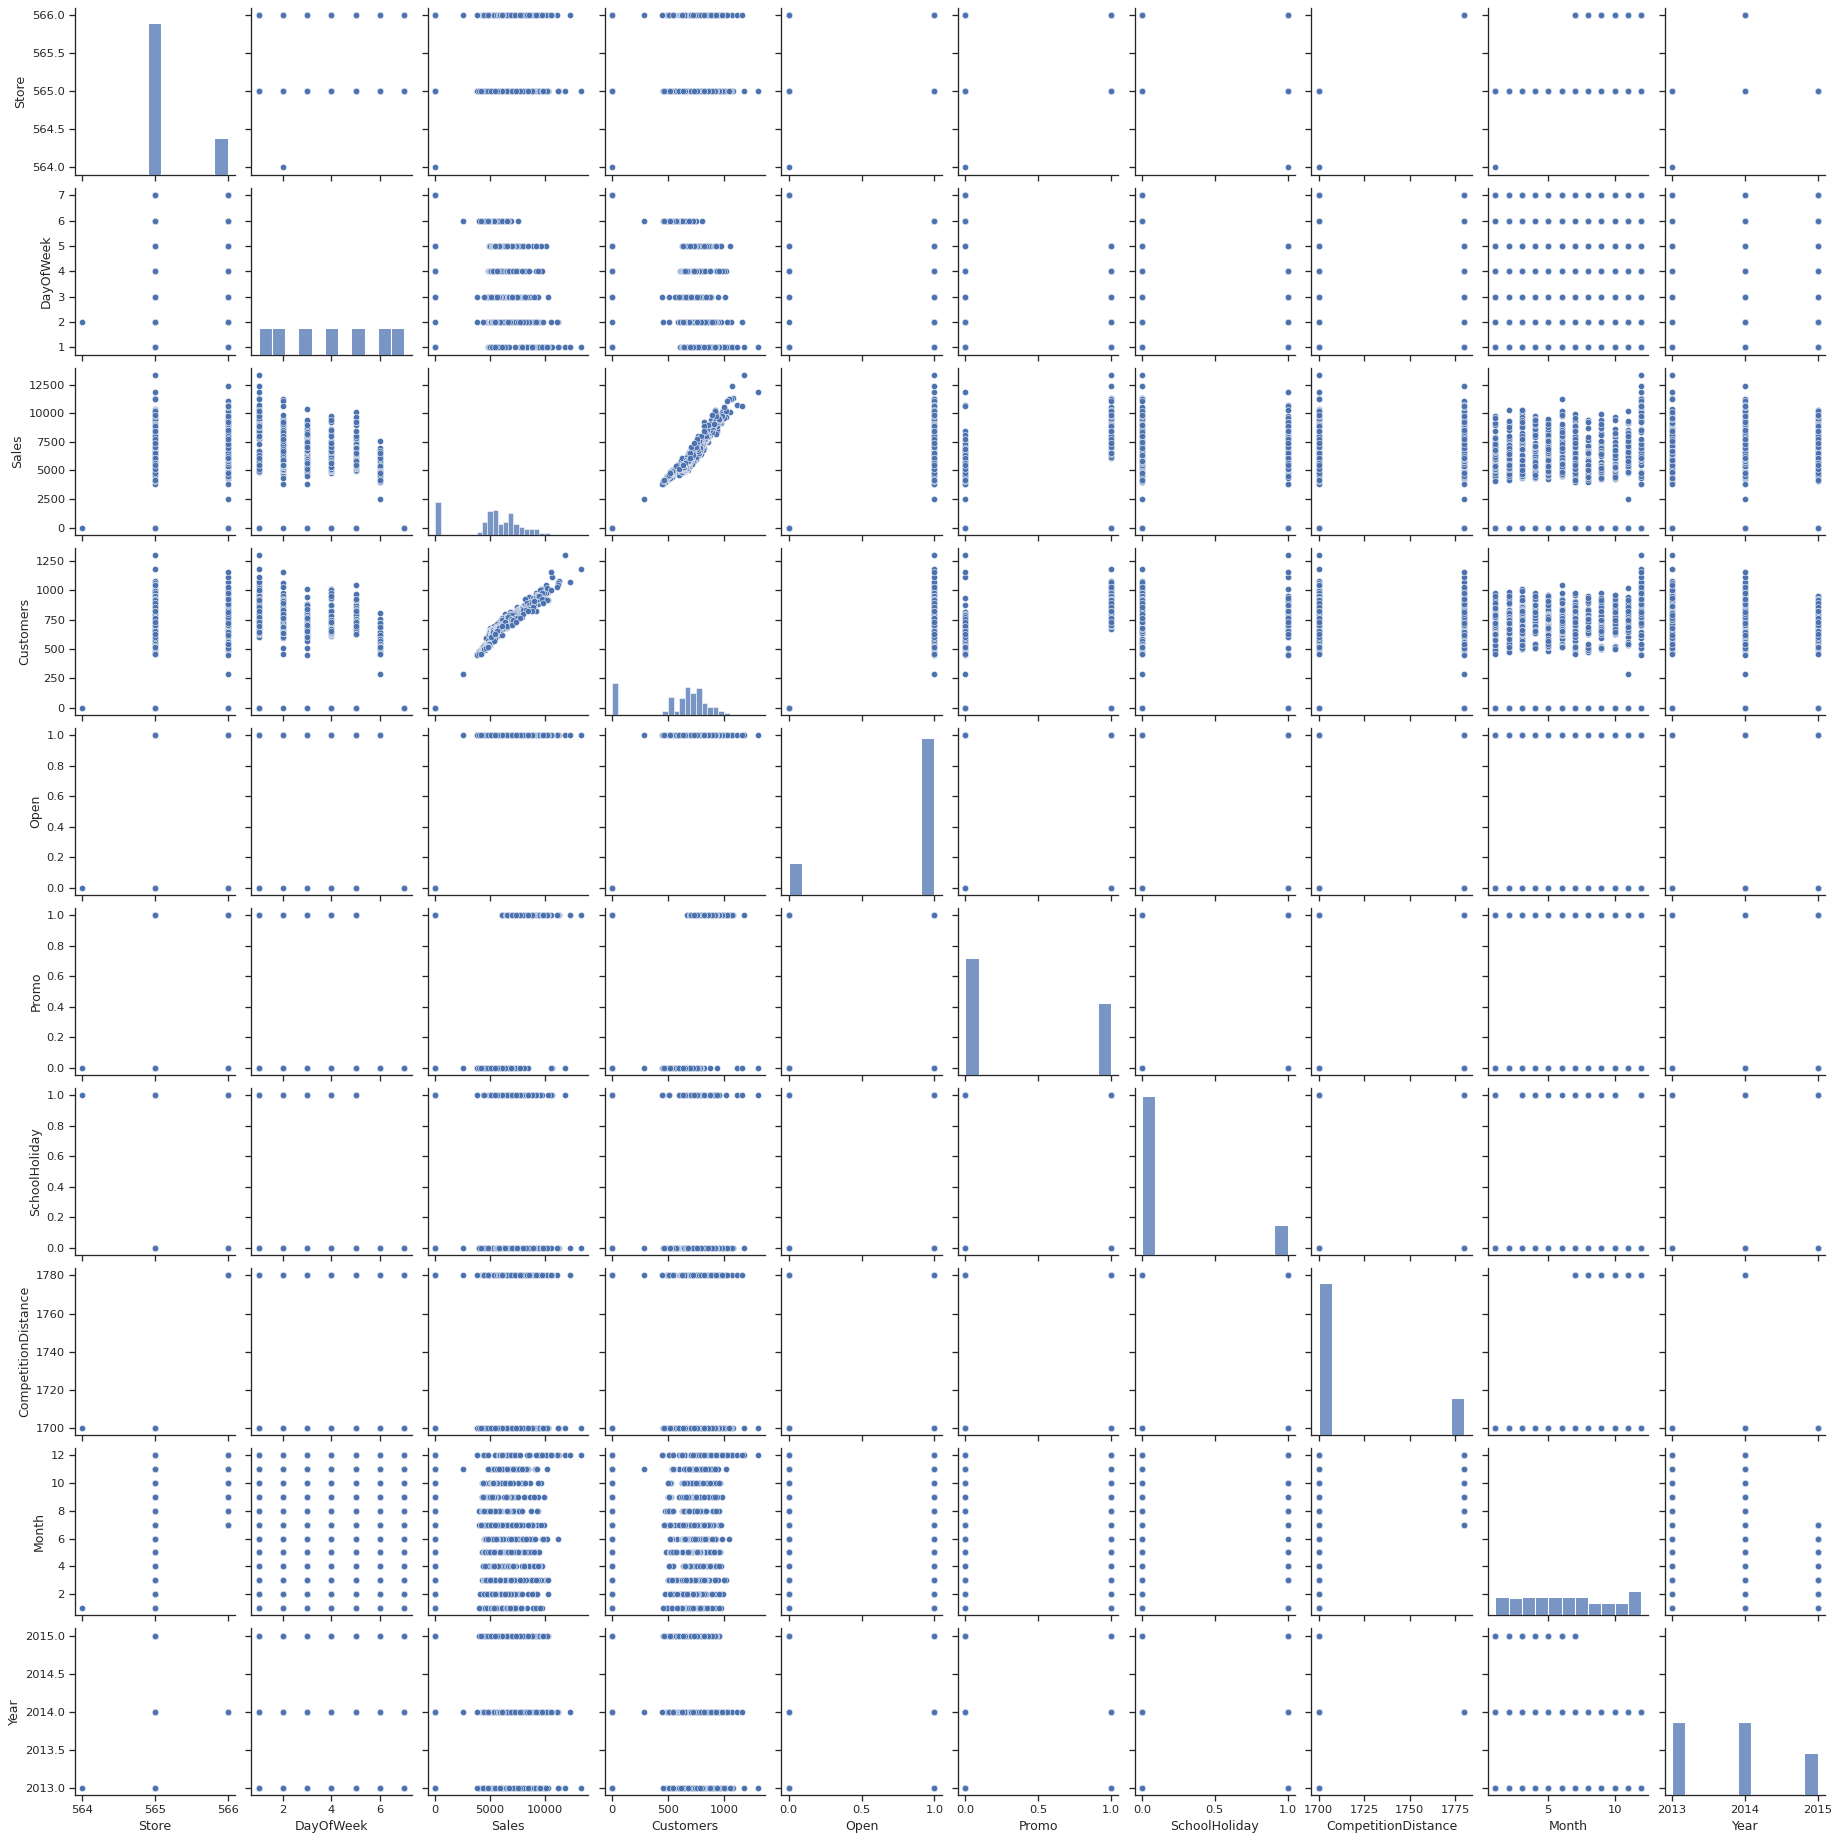

In [89]:
test = df_a[['Store','DayOfWeek', 'Sales', 'Customers', 'Open', 'Promo','SchoolHoliday', 'CompetitionDistance', 'Month', 'Year']]
sns.set_theme(style="ticks")
sns.pairplot(test)

## Dechet

In [65]:
df_a

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,Promo2,StoreType_<a>,StoreType_<b>,StoreType_<c>,StoreType_<d>,Assortment_<a>,Assortment_<b>,Assortment_<c>,Month,Year
Date,,,,,,,,,,,,,,,,,,
2013-01-01,564,2,0,0,0,0,1,1700.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1,2013
2013-01-02,565,3,5993,739,1,0,1,1700.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1,2013
2013-01-03,565,4,5397,665,1,0,1,1700.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1,2013
2013-01-04,565,5,5612,679,1,0,1,1700.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1,2013
2013-01-05,565,6,4254,502,1,0,0,1700.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-07-27,565,1,8847,821,1,1,1,1700.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,7,2015
2015-07-28,565,2,7718,762,1,1,1,1700.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,7,2015
2015-07-29,565,3,7017,701,1,1,1,1700.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,7,2015


Decomposition de la TS

In [40]:
# from statsmodels.tsa.tsatools import detrend
# from statsmodels.tsa.stattools import acf
# from statsmodels.tsa.stattools import pacf
# from statsmodels.graphics.tsaplots import plot_pacf


# ts = train_data
# cor = acf(ts.Sales)

# fig, ax = plt.subplots(1, 1, figsize=(14,2))
# ax.plot(cor)
# ax.set_title("Autocorrélogramme")


# plot_pacf(ts.Sales, lags=50)

In [41]:
# from statsmodels.tsa.seasonal import seasonal_decompose
# res = seasonal_decompose(ts.Sales, freq=7)
# res.plot()

Seaborn

In [42]:
# import seaborn as sns
# sns.set_theme(style="ticks")
# sns.pairplot(store_data, hue="Store")